# Prediction using Unsupervised ML (Level - Beginner)


### Promblem statement:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Credits:Saya Vamshi Krishna

###  Step1:-- Importing Required Libraries

In [55]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

### Step2:-- Load the Data-Set
#### (From local host)

In [5]:
path=r"/Users/vamshikrishna8/Documents/Sparks-Foundation-Internship/Task-2/Iris.csv"
iris_df = pd.read_csv(path)

In [7]:
iris_df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Step3:-- Data Information & Description:

In [9]:
iris_df.info() # data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_df.describe() #data description

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Step3:--Data Visualization 


In [25]:
iris_df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

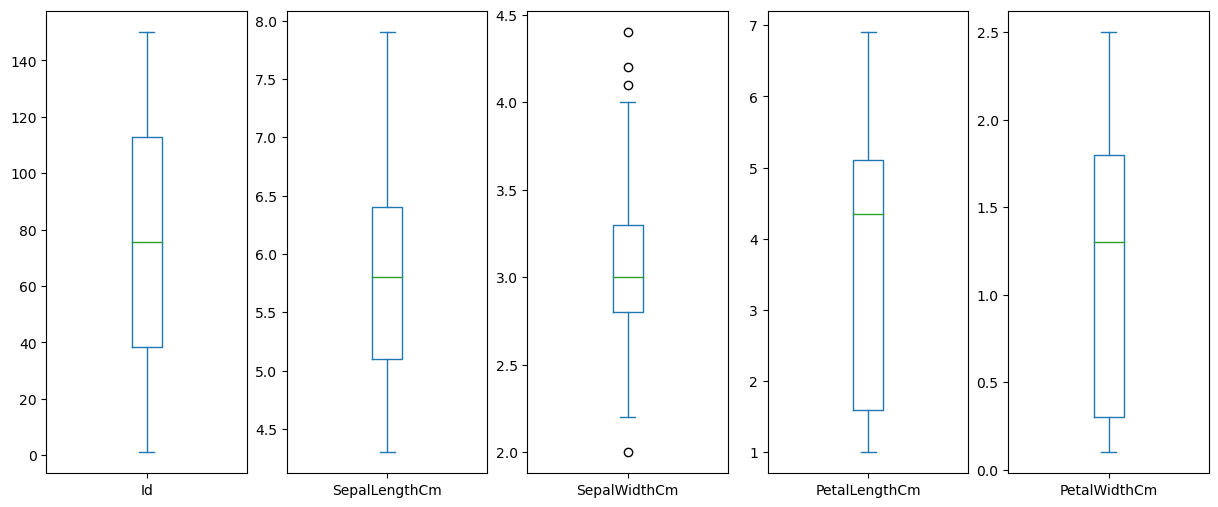

In [24]:
iris_df.plot.box(subplots = True, sharex = False, sharey = False, figsize = (15, 6))
plt.show()

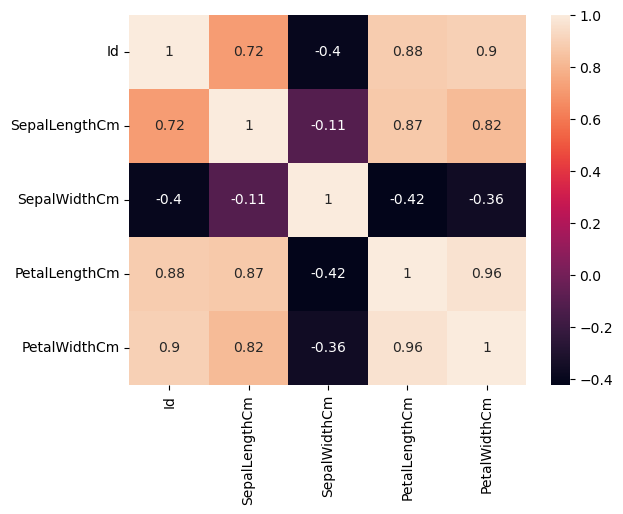

In [60]:
sns.heatmap(num_val, annot = True)
plt.show()

In [17]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

### Step4:- Model Development & Evaluation:
#### Elbow Analysis 

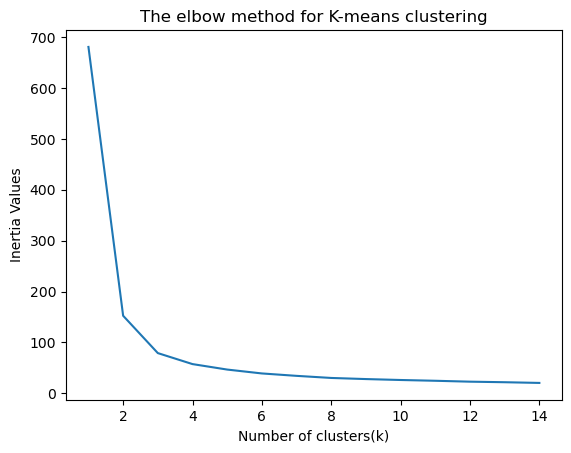

In [51]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 15), wcss)
plt.title('The elbow method for K-means clustering')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia Values') # Within cluster sum of squares
plt.show()

### Final Model:

In [52]:
# Applying kmeans to the dataset / Creating the kmeans classifier
k_means = KMeans(n_clusters = 3, max_iter = 300, random_state = 0, init = 'k-means++')
k_means.fit(x)
pred_y = k_means.predict(x)
print(pred_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [53]:
print(k_means.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


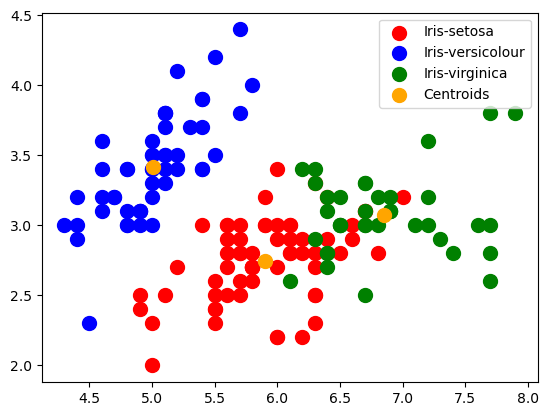

In [54]:
# Visualising the clusters - On the first two columns
plt.scatter(x[pred_y == 0, 0], x[pred_y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_y == 1, 0], x[pred_y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred_y == 2, 0], x[pred_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')

plt.legend()
plt.show()